In [157]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [3]:
df = pd.read_csv('OnlineArrestData1980-2018.csv')

In [5]:
groups = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])

In [7]:
groups = groups[groups.YEAR == 2018]

In [255]:
groups = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
groups = groups[groups.YEAR == 2018]
groups = groups = groups.groupby(['COUNTY','GENDER','YEAR']).sum().reset_index()
groups = groups.sort_values('PROPERTY', ascending = False)
groups.head()

,COUNTY,GENDER,YEAR,PROPERTY
37,Los Angeles County,Male,2018,14261
71,San Bernardino County,Male,2018,5334
36,Los Angeles County,Female,2018,4640
59,Orange County,Male,2018,3635
73,San Diego County,Male,2018,3163


In [198]:
groups2 = df.drop(columns = ['VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
groups2 = groups2[groups2.YEAR == 2018]
groups2 = groups2.groupby(['COUNTY', 'YEAR']).sum().reset_index()
groups2 = groups2.sort_values('PROPERTY', ascending = False)
groups2

,COUNTY,YEAR,PROPERTY
18,Los Angeles County,2018,18901
35,San Bernardino County,2018,7310
29,Orange County,2018,4877
36,San Diego County,2018,4140
32,Riverside County,2018,3565
33,Sacramento County,2018,3142
0,Alameda County,2018,3051
42,Santa Clara County,2018,2938
6,Contra Costa County,2018,2740
14,Kern County,2018,2607


In [138]:
male_avg = np.array(male_avg)

In [172]:
page = requests.get('https://www.california-demographics.com/counties_by_population')
soup = BeautifulSoup(page.content, 'html.parser')
container =  pd.read_html(page.content)

In [179]:
container = pd.DataFrame(container[0])

In [195]:
container.drop(columns = ['Rank'], inplace = True)

In [259]:
combined_table = container.join(groups2.set_index('COUNTY'), on = 'County')

In [260]:
combined_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
County        59 non-null object
Population    59 non-null object
YEAR          58 non-null float64
PROPERTY      58 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


In [261]:
combined_table = combined_table.drop(58, axis=0)
combined_table = combined_table.astype({'Population':int, 'PROPERTY':int})

In [266]:
percentage = combined_table['PROPERTY']/combined_table['Population']
type(df86)

pandas.core.frame.DataFrame

In [267]:
combined_table['percentage'] = percentage

In [298]:
combined_table = combined_table.groupby(['County']).sum().reset_index()
combined_table = combined_table.sort_values('percentage', ascending = False)
combined_table.tail()

,County,Population,YEAR,PROPERTY,percentage
40,San Mateo County,769545,2018.0,874,0.001136
2,Amador County,39383,2018.0,40,0.001016
4,Calaveras County,45602,2018.0,42,0.000921
34,San Benito County,61537,2018.0,51,0.000829
25,Mono County,14250,2018.0,9,0.000632


In [297]:
sc = combined_table[combined_table['County'] == 'Sierra County']
sbc = combined_table[combined_table['County'] == 'San Bernardino County']
tc = combined_table[combined_table['County'] == 'Tulare County']
kc = combined_table[combined_table['County'] == 'Kern County']
sutter = combined_table[combined_table['County'] == 'Sutter County']
top_5 = pd.concat([sc, sbc, tc, kc, sutter])
top_5

,County,Population,YEAR,PROPERTY,percentage
45,Sierra County,2987,2018.0,15,0.005022
35,San Bernardino County,2171603,2018.0,7310,0.003366
53,Tulare County,465861,2018.0,1495,0.003209
14,Kern County,896764,2018.0,2607,0.002907
50,Sutter County,96807,2018.0,254,0.002624


In [311]:
smc = combined_table[combined_table['County'] == 'San Mateo County']
ac = combined_table[combined_table['County'] == 'Amador County']
cc = combined_table[combined_table['County'] == 'Calaveras County']
sbc = combined_table[combined_table['County'] == 'San Benito County']
mc = combined_table[combined_table['County'] == 'Mono County']
bot_5 = pd.concat([smc, ac, cc, sbc, mc])
bot_5

,County,Population,YEAR,PROPERTY,percentage
40,San Mateo County,769545,2018.0,874,0.001136
2,Amador County,39383,2018.0,40,0.001016
4,Calaveras County,45602,2018.0,42,0.000921
34,San Benito County,61537,2018.0,51,0.000829
25,Mono County,14250,2018.0,9,0.000632


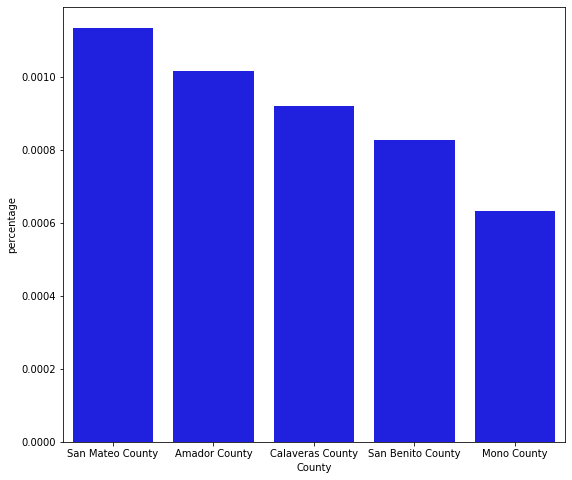

In [322]:
plt.figure(figsize = (9,8))
sns.barplot(y = 'percentage', x ='County', data = bot_5, color = 'blue')
plt.show()